In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data sets
ad = pd.read_csv('/Users/GianniXue/Documents/actual_duration.csv')
ar = pd.read_csv('/Users/GianniXue/Documents/appointments_regional.csv')
nc = pd.read_excel('/Users/GianniXue/Documents/national_categories.xlsx')

# Sense-check new DataFrames
print('Actual Duration DataFrame:')
print('Columns:', ad.columns)
print('Number of rows and columns:', ad.shape)
print('Data types:', ad.dtypes)
print('Number of missing values:', ad.isnull().sum())

print('\nAppointments Regional DataFrame:')
print('Columns:', ar.columns)
print('Number of rows and columns:', ar.shape)
print('Data types:', ar.dtypes)
print('Number of missing values:', ar.isnull().sum())

print('\nNational Categories DataFrame:')
print('Columns:', nc.columns)
print('Number of rows and columns:', nc.shape)
print('Data types:', nc.dtypes)
print('Number of missing values:', nc.isnull().sum())

# Descriptive statistics and metadata
print('\nDescriptive statistics and metadata for Actual Duration:')
print(ad.describe())
print(ad.info())

print('\nDescriptive statistics and metadata for Appointments Regional:')
print(ar.describe())
print(ar.info())

print('\nDescriptive statistics and metadata for National Categories:')
print(nc.describe())
print(nc.info())

# Exploration
location_counts = nc['sub_icb_location_name'].value_counts()
print("Count of locations: ", location_counts)

Actual Duration DataFrame:
Columns: Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')
Number of rows and columns: (137793, 8)
Data types: sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Number of missing values: sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

Appointments Regional DataFrame:
Columns: Index(['icb_ons_code', 'appointment_month', 'appointment_s

In [5]:
# What are the five locations with the highest number of records?
top_5 = ad.nlargest(5, 'count_of_appointments')

top_values = top_5['count_of_appointments']
corresponding_locations = top_5['sub_icb_location_name']

# Print top 5 values and corresponding locations
for value, location in zip(top_values, corresponding_locations):
    print("Count of Appointments:", value, "| Location:", location)

Count of Appointments: 15400 | Location: NHS North East London ICB - A3A8R
Count of Appointments: 15081 | Location: NHS North East London ICB - A3A8R
Count of Appointments: 14767 | Location: NHS North East London ICB - A3A8R
Count of Appointments: 14665 | Location: NHS North East London ICB - A3A8R
Count of Appointments: 14664 | Location: NHS North East London ICB - A3A8R


In [6]:
# How many service settings, context types, national categories, and appointment statuses are there?

# Service settings
num_service_setting = nc['service_setting'].nunique()
print('Number of service settings:', num_service_setting)

# Context types
num_context_type = nc['context_type'].nunique()
print('Number of context type:', num_context_type)

# National categories
num_national_categories = nc['national_category'].nunique()
print('Number of national categories:', num_national_categories)

# Appointment Statuses
num_appointment_statuses = ar['appointment_status'].nunique()
print('Number of appointment statuses:', num_appointment_statuses)

Number of service settings: 5
Number of context type: 3
Number of national categories: 18
Number of appointment statuses: 3


In [7]:
# How many locations are there in the data set?
ad_unique_locations_count = ad['sub_icb_location_code'].nunique()
print("Number of locations:", ad_unique_locations_count)

#How many locations are there in the data set?
nc_unique_locations_count = nc['sub_icb_location_name'].nunique()
print("Number of locations:", nc_unique_locations_count)

Number of locations: 106
Number of locations: 106


In [8]:
# Between what dates were appointments scheduled?
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])
min_date_ad = ad['appointment_date'].min().date()
max_date_ad = ad['appointment_date'].max().date()
print(f"For ad, appointments were scheduled from {min_date_ad} to {max_date_ad}")

For ad, appointments were scheduled from 2021-12-01 to 2022-06-30


In [9]:
# Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?
nc_subset = nc[(nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') & 
               (nc['appointment_date'] >= '01/01/2022') & 
               (nc['appointment_date'] <= '01/06/2022')]
service_setting_counts = nc_subset['service_setting'].value_counts()
print(service_setting_counts.idxmax(), service_setting_counts.max())

General Practice 72


In [10]:
# Which month had the highest number of appointments?
appointments_per_month = nc.groupby('appointment_month').size()
highest_month = appointments_per_month.idxmax()
highest_count = appointments_per_month.max()
print(f"The month with the highest number of appointments was {highest_month} with {highest_count} appointments.")

The month with the highest number of appointments was 2022-03 with 82822 appointments.


In [11]:
# What was the total number of records per month?
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])
nc_2021 = nc[nc['appointment_month'].dt.year == 2021]
nc_2022 = nc[nc['appointment_month'].dt.year == 2022]
rows_per_month_2021 = nc_2021.groupby(nc_2021['appointment_month'].dt.month).size()
rows_per_month_2022 = nc_2022.groupby(nc_2022['appointment_month'].dt.month).size()
print("Rows per month in 2021:")
print(rows_per_month_2021)
print("\nRows per month in 2022:")
print(rows_per_month_2022)

Rows per month in 2021:
appointment_month
8     69999
9     74922
10    74078
11    77652
12    72651
dtype: int64

Rows per month in 2022:
appointment_month
1    71896
2    71769
3    82822
4    70012
5    77425
6    74168
dtype: int64


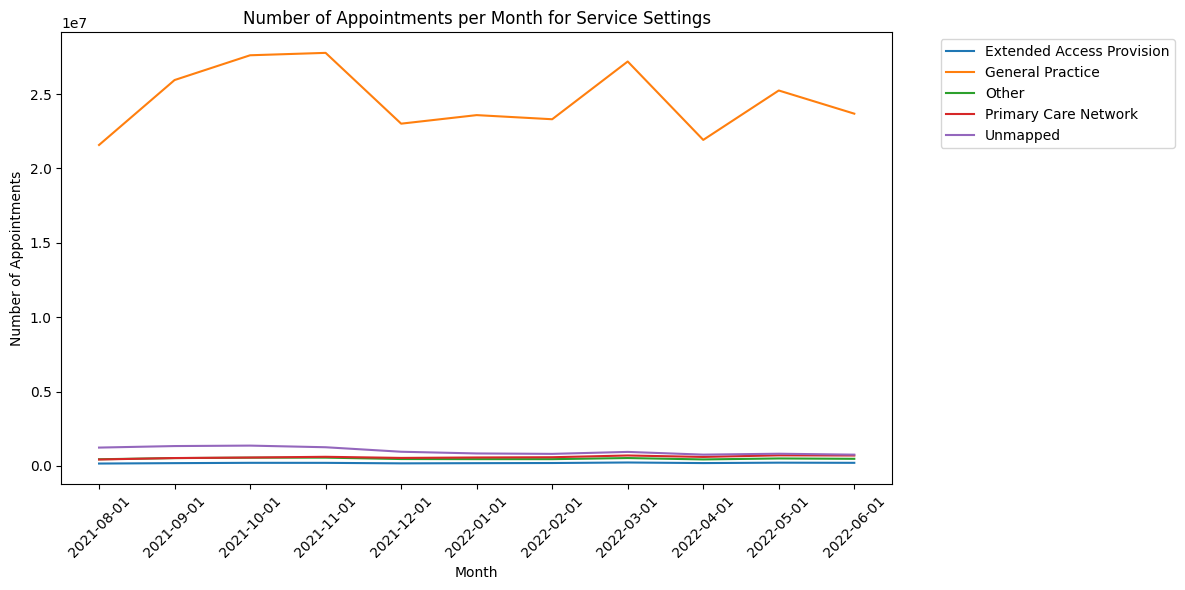

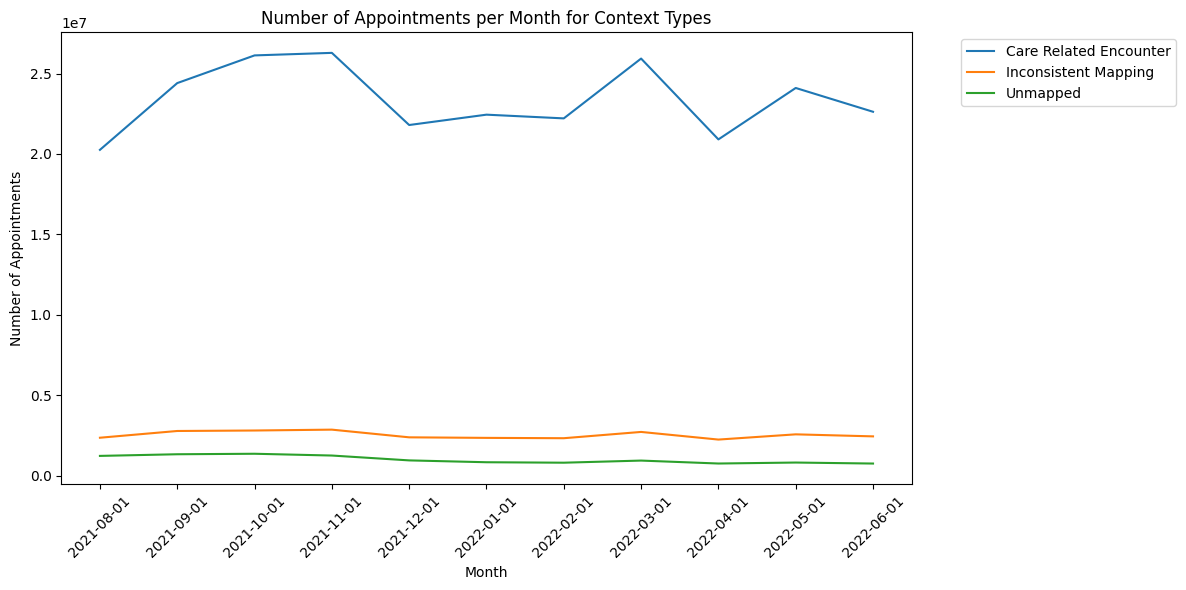

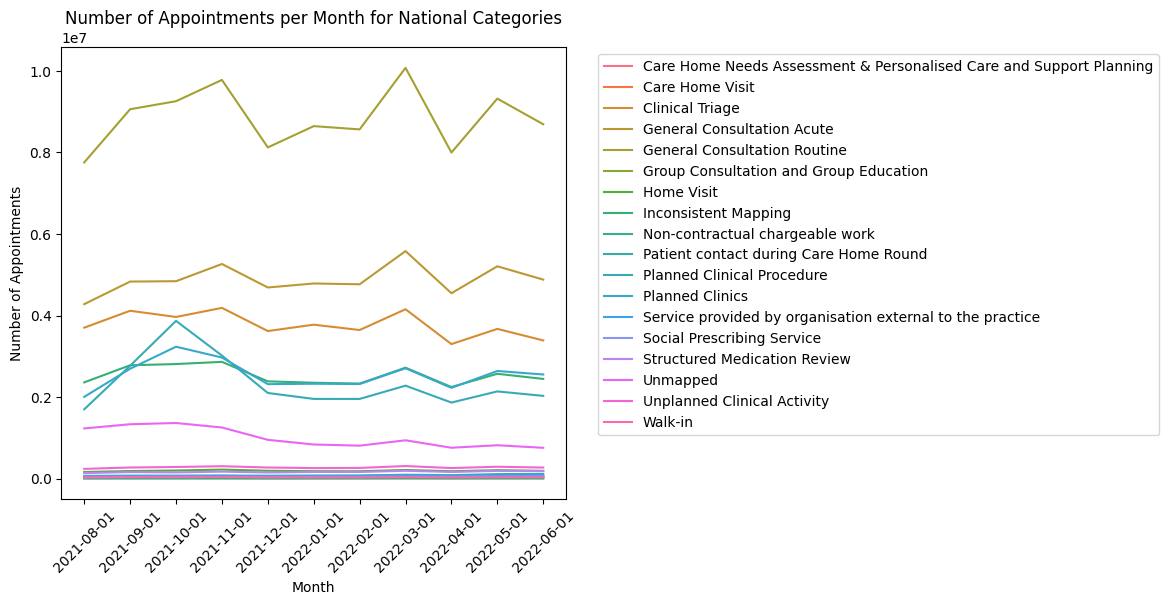

In [12]:
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Number of Appointments per Month for Service Settings
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

plt.figure(figsize=(12, 6))  
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss, errorbar=None)
plt.title('Number of Appointments per Month for Service Settings')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()


# Number of Appointments per Month for Context Types
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

plt.figure(figsize=(12, 6)) 
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', data=nc_ct, errorbar=None)
plt.title('Number of Appointments per Month for Context Types')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)  
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout() 
plt.show()


# Number of Appointments
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

plt.figure(figsize=(12, 6)) 
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc, errorbar=None)
plt.title('Number of Appointments per Month for National Categories')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45) 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()

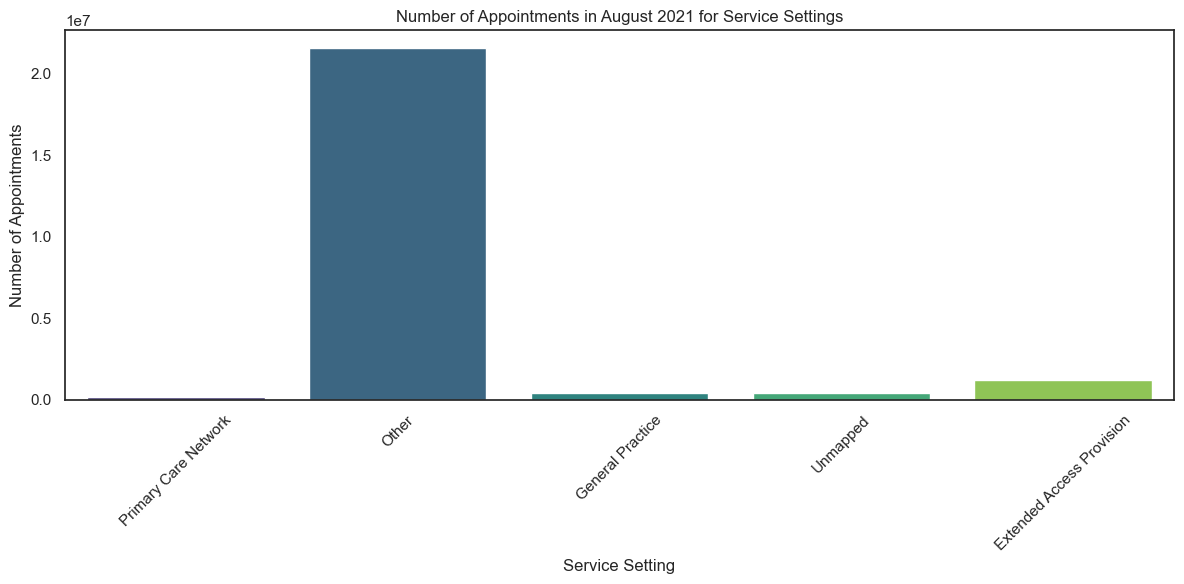

In [36]:
# Summer Season
# Number of Appointments in August 2021 for Service Settings
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])
nc_august = nc[nc['appointment_month'] == '2021-08']

# Check if data is present for the specified month
if nc_august.empty:
    print("No records found for August 2021.")
else:
    service_settings_list = nc_august['service_setting'].unique()
    appointments_per_month_list = nc_august.groupby('service_setting')['count_of_appointments'].sum().tolist()

    plt.figure(figsize=(12, 6))
    sns.barplot(x=service_settings_list, y=appointments_per_month_list, palette='viridis')
    plt.title('Number of Appointments in August 2021 for Service Settings')
    plt.xlabel('Service Setting')
    plt.ylabel('Number of Appointments')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


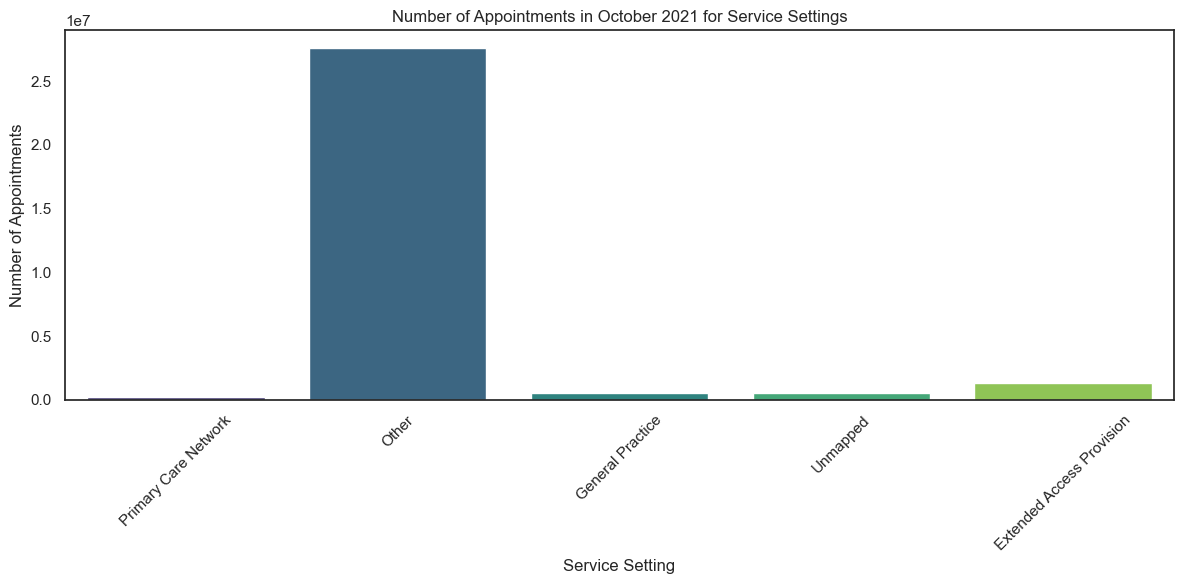

In [37]:
# Autumn season
# Number of Appointments in October 2021 for Service Settings
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])
nc_october = nc[nc['appointment_month'] == '2021-10']

service_settings_list_october = nc_october['service_setting'].unique()
appointments_per_month_list_october = nc_october.groupby('service_setting')['count_of_appointments'].sum().tolist()

plt.figure(figsize=(12, 6))
sns.barplot(x=service_settings_list_october, y=appointments_per_month_list_october, palette='viridis')
plt.title('Number of Appointments in October 2021 for Service Settings')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

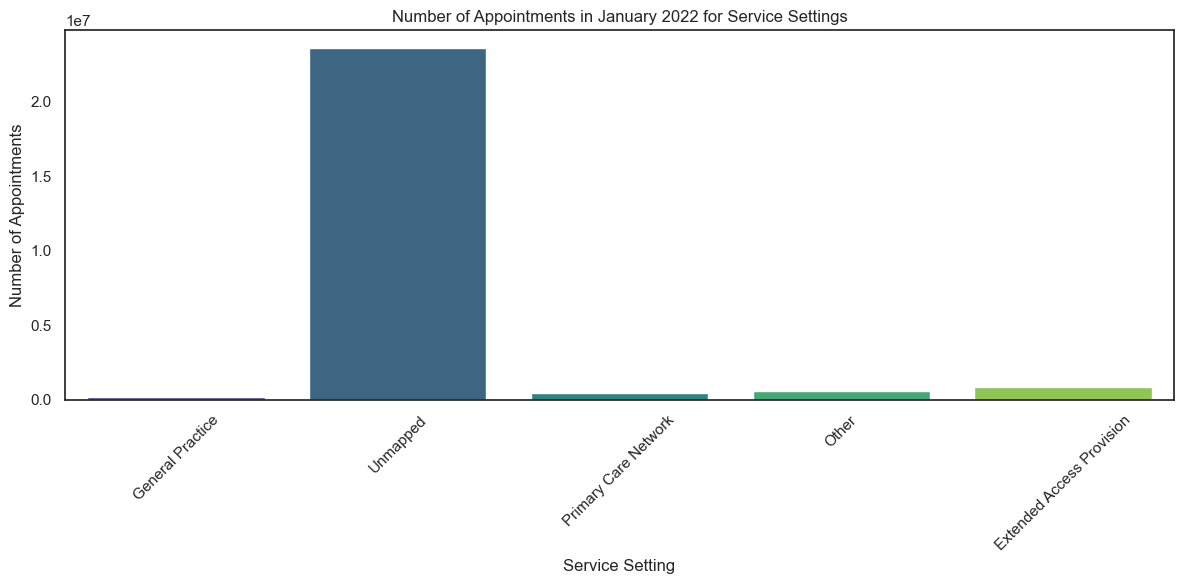

In [38]:
# Winter season
# Number of Appointments in January 2022 for Service Settings
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])
nc_january = nc[nc['appointment_month'] == '2022-01']

service_settings_list_january = nc_january['service_setting'].unique()
appointments_per_month_list_january = nc_january.groupby('service_setting')['count_of_appointments'].sum().tolist()


plt.figure(figsize=(12, 6))
sns.barplot(x=service_settings_list_january, y=appointments_per_month_list_january, palette='viridis')
plt.title('Number of Appointments in January 2022 for Service Settings')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

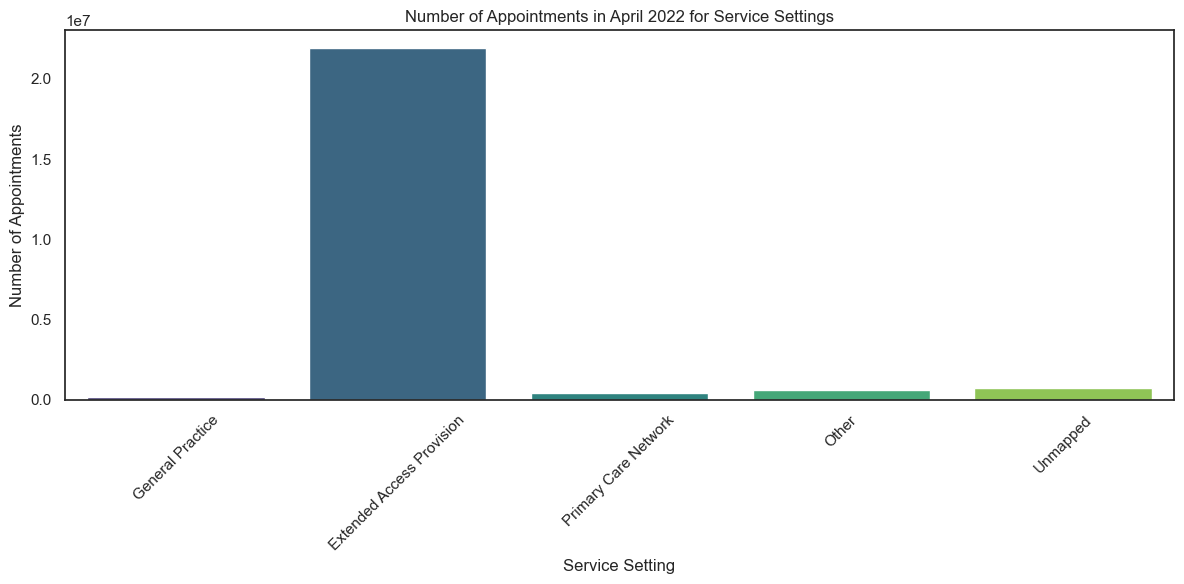

In [39]:
# Spring season
# Number of Appointments in April 2022 for Service Settings
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])
nc_april = nc[nc['appointment_month'] == '2022-04']

service_settings_list_april = nc_april['service_setting'].unique()
appointments_per_month_list_april = nc_april.groupby('service_setting')['count_of_appointments'].sum().tolist()


plt.figure(figsize=(12, 6))
sns.barplot(x=service_settings_list_april, y=appointments_per_month_list_april, palette='viridis')
plt.title('Number of Appointments in April 2022 for Service Settings')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

              tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansasâ€™ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring forâ€¦   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a higâ€¦   
3            

<Axes: xlabel='count', ylabel='word'>

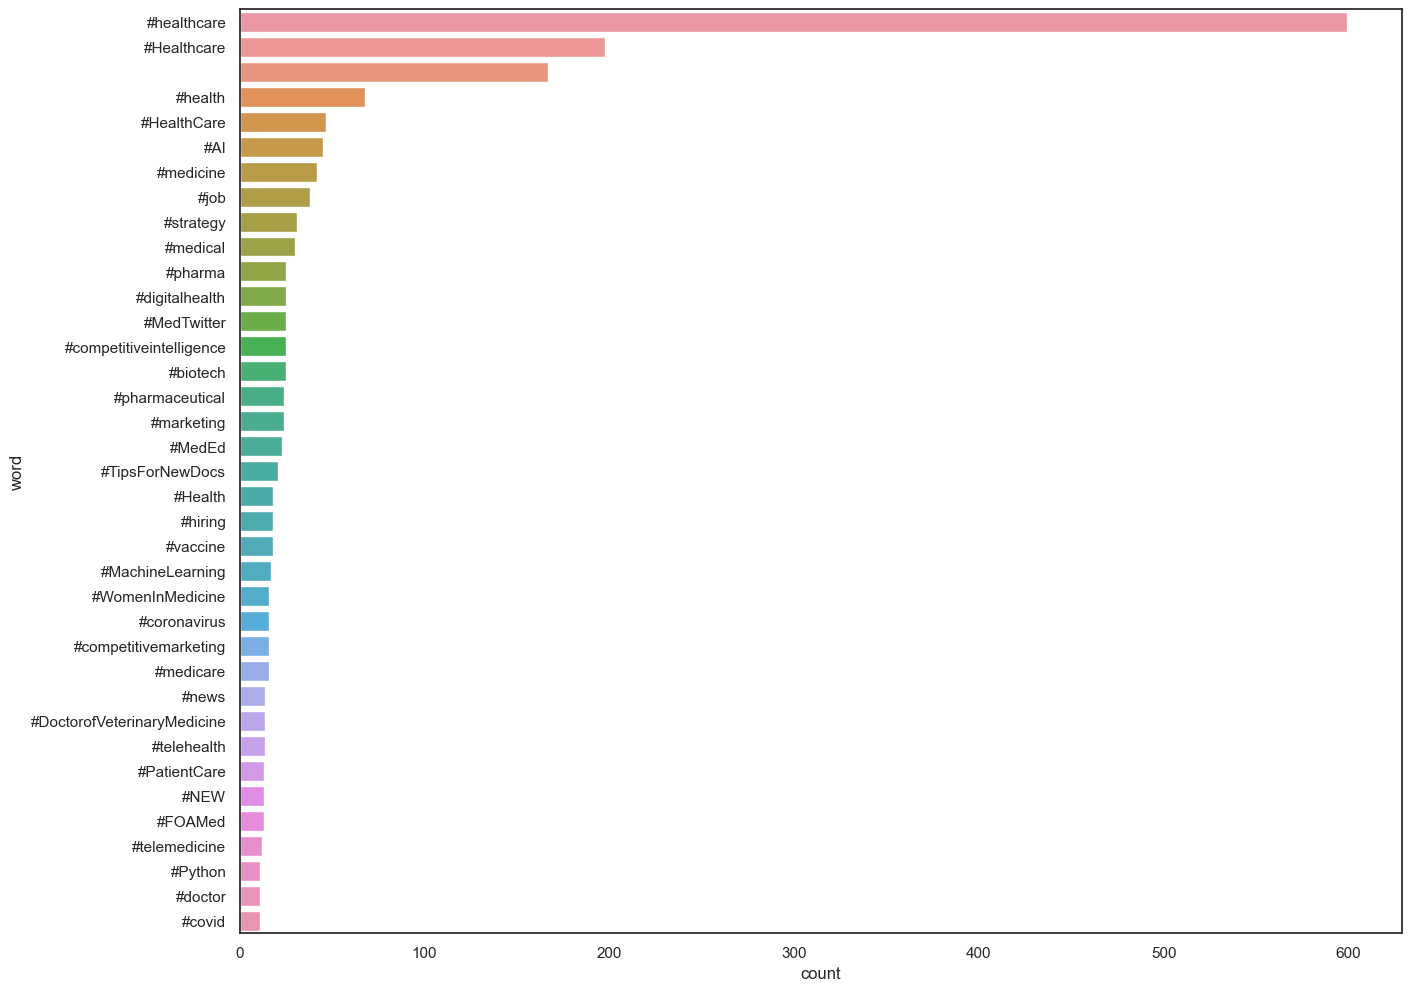

In [48]:
tweets = pd.read_csv('/Users/GianniXue/Documents/tweets.csv')
sns.set(rc={'figure.figsize':(15, 12)})
sns.set_style("white")

pd.options.display.max_colwidth = 200

print(tweets.head())
print(tweets.describe())
print(tweets.info())
print(tweets['tweet_retweet_count'].value_counts())
print(tweets['tweet_favorite_count'].value_counts())

# Using tweet_entities_hashtags instead of tweet_full_text
tweets_text = pd.DataFrame(tweets['tweet_entities_hashtags'])

# Convert the 'tweet_entities_hashtags' column to strings and handle NaN values
tweets_text['tweet_entities_hashtags'] = tweets_text['tweet_entities_hashtags'].apply(lambda x: str(x) if pd.notnull(x) else "")
print(tweets_text.head())

tags = []
for entry in tweets_text['tweet_entities_hashtags']:
    tags.extend(entry.split(', '))
tags_series = pd.Series(tags)
print(tags_series.head(30))

data = tags_series.value_counts().reset_index()
data.columns = ['word', 'count']
data['count'] = data['count'].astype(int)
print(data.head())

sns.barplot(x='count', y='word', data=data[data['count'] > 10])
filtered_data = data[data['count'] > 10]
sns.barplot(x='count', y='word', data=filtered_data)

In [41]:
# Sum of count_of_appointments
ar_agg = ar[['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments']]
ar_agg = ar_agg.groupby(['appointment_month', 'hcp_type', 'appointment_status', 'appointment_mode', 'time_between_book_and_appointment']).sum().reset_index()

print(ar_agg)

      appointment_month hcp_type appointment_status appointment_mode  \
0               2020-01       GP           Attended     Face-to-Face   
1               2020-01       GP           Attended     Face-to-Face   
2               2020-01       GP           Attended     Face-to-Face   
3               2020-01       GP           Attended     Face-to-Face   
4               2020-01       GP           Attended     Face-to-Face   
...                 ...      ...                ...              ...   
10134           2022-06  Unknown            Unknown          Unknown   
10135           2022-06  Unknown            Unknown          Unknown   
10136           2022-06  Unknown            Unknown          Unknown   
10137           2022-06  Unknown            Unknown          Unknown   
10138           2022-06  Unknown            Unknown     Video/Online   

      time_between_book_and_appointment  count_of_appointments  
0                                 1 Day                 653846  
1    

In [42]:
# Total appointments per month
ar_df = ar_agg.groupby('appointment_month')['count_of_appointments'].sum().reset_index()

# Average utilization of services
ar_df['utilisation'] = ar_df['count_of_appointments'] / 30  

# Limit the utilization to a maximum of 1,200,000 appointments per day
ar_df['utilisation'] = ar_df['utilisation'].apply(lambda x: min(x, 1200000))

# Round the utilization to one decimal place
ar_df['utilisation'] = ar_df['utilisation'].round(1)

# View the DataFrame
print(ar_df)

   appointment_month  count_of_appointments  utilisation
0            2020-01               27199296     906643.2
1            2020-02               24104621     803487.4
2            2020-03               24053468     801782.3
3            2020-04               16007881     533596.0
4            2020-05               16417212     547240.4
5            2020-06               20690805     689693.5
6            2020-07               22491437     749714.6
7            2020-08               20150520     671684.0
8            2020-09               26714255     890475.2
9            2020-10               28301932     943397.7
10           2020-11               25061602     835386.7
11           2020-12               23535936     784531.2
12           2021-01               22492069     749735.6
13           2021-02               22399569     746652.3
14           2021-03               27225424     907514.1
15           2021-04               23879932     795997.7
16           2021-05           

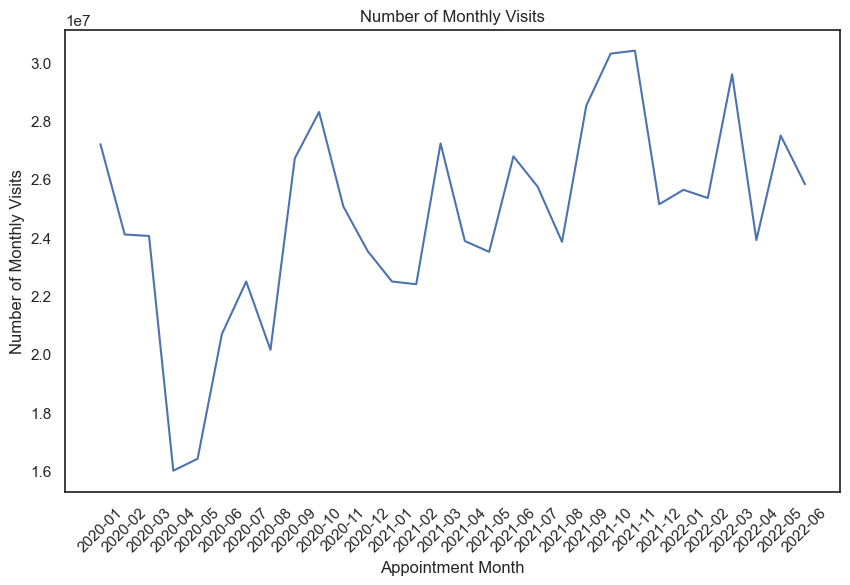

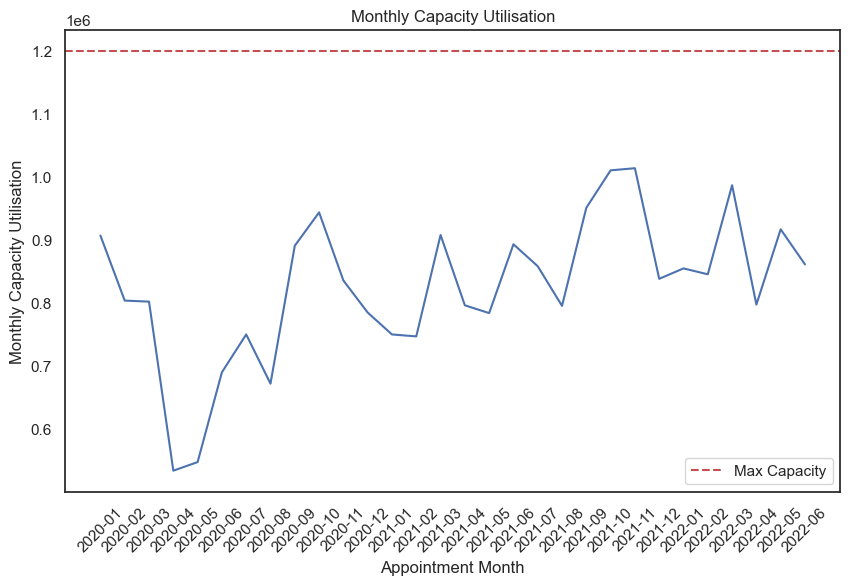

In [43]:
# Convert appointment_month to string for ease of visualization
ar_agg['appointment_month'] = ar_agg['appointment_month'].astype(str)
ar_df['appointment_month'] = ar_df['appointment_month'].astype(str)

# Create lineplot indicating the number of monthly visits
plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_df, x='appointment_month', y='count_of_appointments')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Monthly Visits')
plt.title('Number of Monthly Visits')
plt.xticks(rotation=45)
plt.show()

# Create lineplot indicating the monthly capacity utilisation
plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_df, x='appointment_month', y='utilisation')
plt.axhline(y=1200000, color='r', linestyle='--', label='Max Capacity')
plt.xlabel('Appointment Month')
plt.ylabel('Monthly Capacity Utilisation')
plt.title('Monthly Capacity Utilisation')
plt.xticks(rotation=45)
plt.legend()
plt.show()

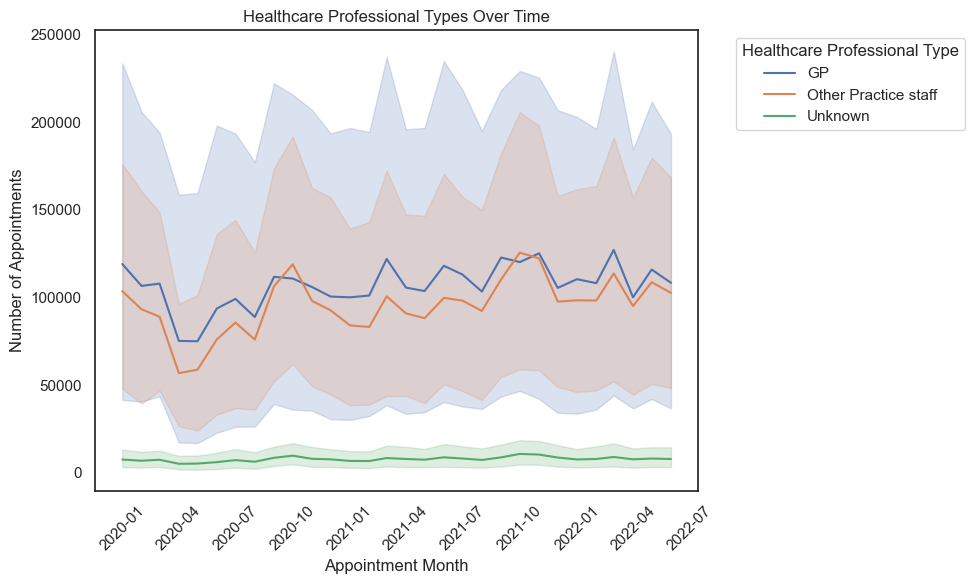

In [44]:
# How do the healthcare professional types differ over time?
ar_agg['appointment_month'] = pd.to_datetime(ar_agg['appointment_month'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', hue='hcp_type')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.title('Healthcare Professional Types Over Time')
plt.xticks(rotation=45)
plt.legend(title='Healthcare Professional Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

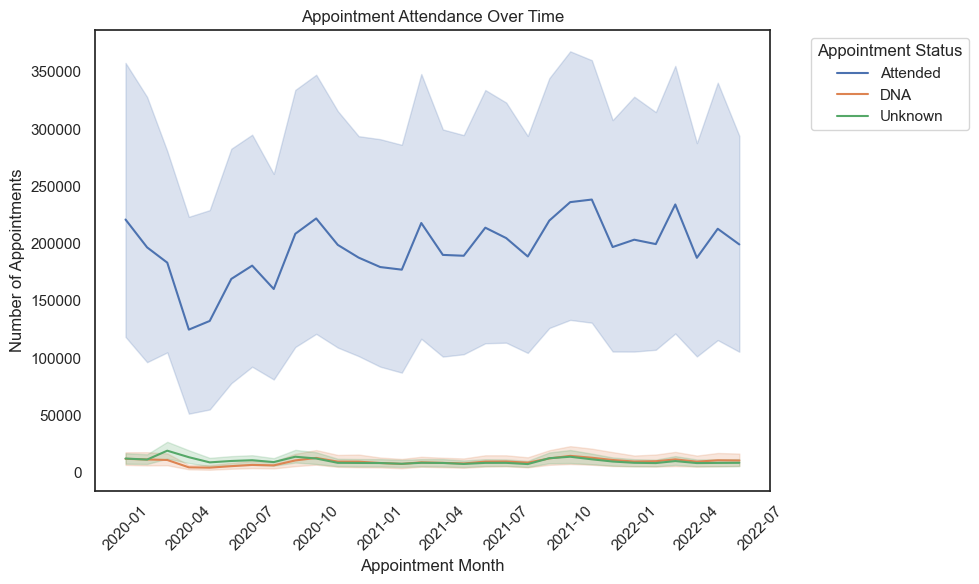

In [45]:
# Are there significant changes in whether or not visits are attended?
ar_agg['appointment_month'] = pd.to_datetime(ar_agg['appointment_month'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', hue='appointment_status')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.title('Appointment Attendance Over Time')
plt.xticks(rotation=45)
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

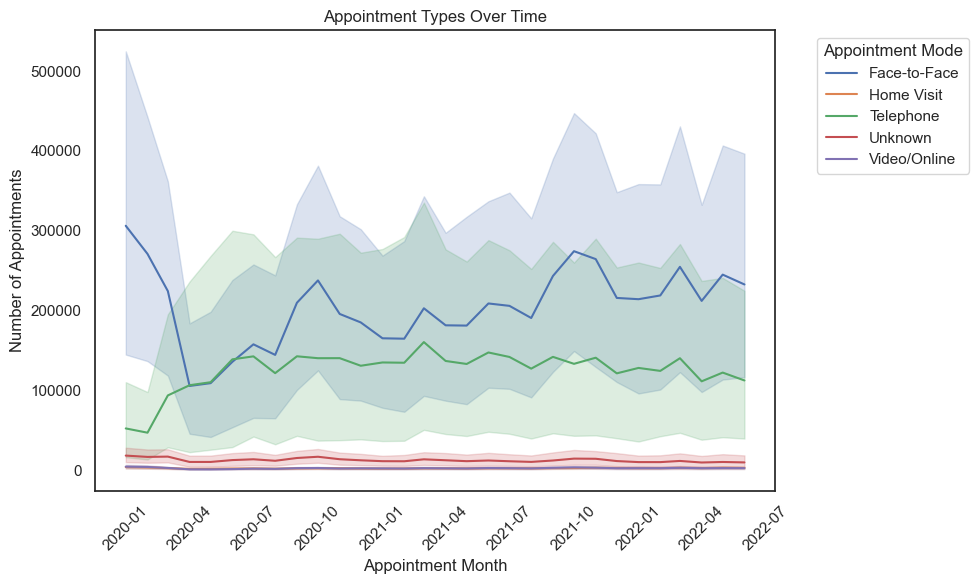

In [46]:
# Are there changes in terms of appointment type and the busiest months?
ar_agg['appointment_month'] = pd.to_datetime(ar_agg['appointment_month'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_agg, x='appointment_month', y='count_of_appointments', hue='appointment_mode')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.title('Appointment Types Over Time')
plt.xticks(rotation=45)
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

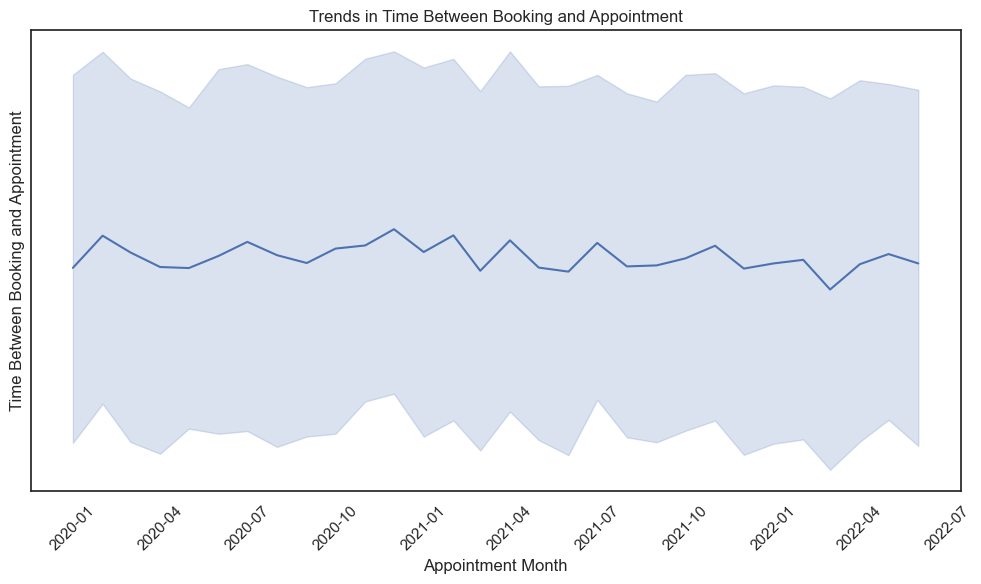

In [47]:
# Are there any trends in time between booking an appointment?
plt.figure(figsize=(10, 6))
sns.lineplot(data=ar_agg, x='appointment_month', y='time_between_book_and_appointment')
plt.xlabel('Appointment Month')
plt.ylabel('Time Between Booking and Appointment')
plt.title('Trends in Time Between Booking and Appointment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   appointment_month            service_setting  count_of_appointments
0         2021-08-01  Extended Access Provision                   9023
1         2021-08-01           General Practice                  31381
2         2021-08-01                      Other                  12294
3         2021-08-01       Primary Care Network                  14773
4         2021-08-01                   Unmapped                   2528
5         2021-09-01  Extended Access Provision                   9707
6         2021-09-01           General Practice                  33477
7         2021-09-01                      Other                  13098
8         2021-09-01       Primary Care Network                  15964
9         2021-09-01                   Unmapped                   2676
10        2021-10-01  Extended Access Provision                   9653
11        2021-10-01           General Practice                  33327
12        2021-10-01                      Other                  12730
13    

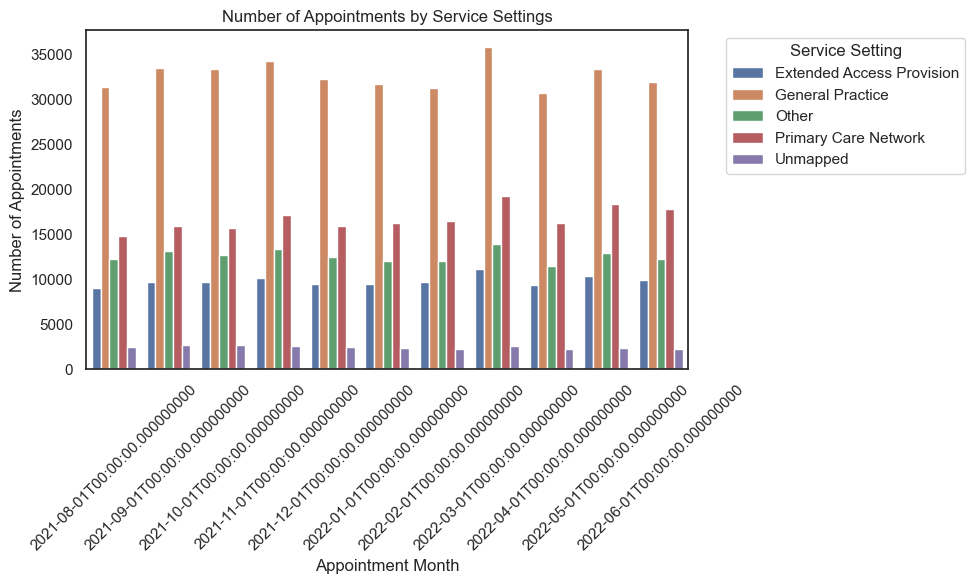

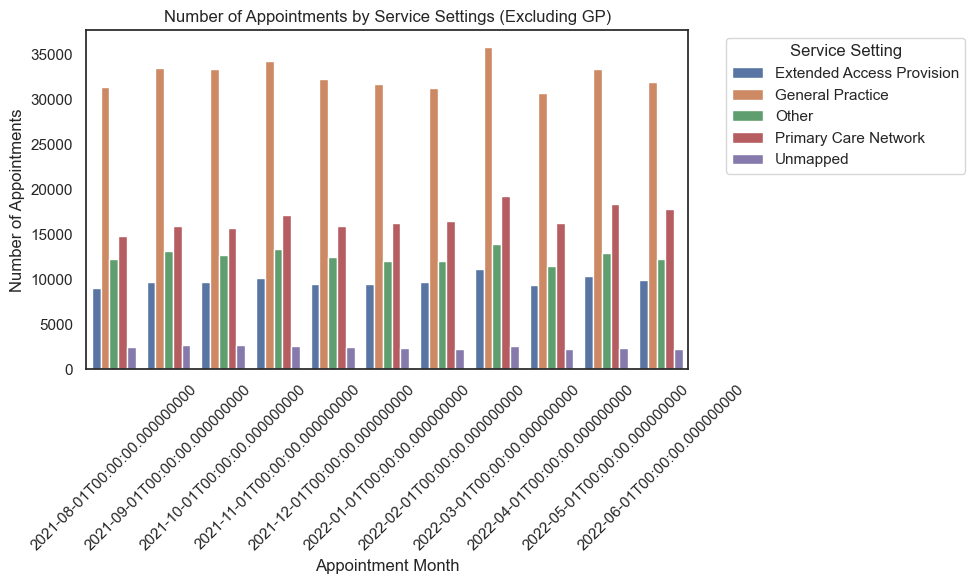

In [26]:
# How do the various service settings compare?
# Count of appointments
service_appointments = nc.groupby(['appointment_month', 'service_setting']).size().reset_index(name='count_of_appointments')
print(service_appointments)


service_appointments['appointment_month'] = pd.to_datetime(service_appointments['appointment_month'])
plt.figure(figsize=(10, 6))
sns.barplot(data=service_appointments, x='appointment_month', y='count_of_appointments', hue='service_setting')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.title('Number of Appointments by Service Settings')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


service_appointments_without_GP = service_appointments[service_appointments['service_setting'] != 'GP']
plt.figure(figsize=(10, 6))
sns.barplot(data=service_appointments_without_GP, x='appointment_month', y='count_of_appointments', hue='service_setting')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')
plt.title('Number of Appointments by Service Settings (Excluding GP)')
plt.xticks(rotation=45)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()